# First Evaluation 

Uni-Variate Numeric linear regression vs Multi-Variate Categorical linear regression

### Uni-Variate Numeric linear regression:

Definition: A statistical technique that models the relationship between a single independent numeric variable (predictor) and a numeric dependent variable (outcome).

Data Used: Both the predictor and outcome variables are numeric (e.g., predicting weight based on height).


### Multivariate Categorical Linear Regression:

Definition: A linear regression model that involves multiple independent variables, which are categorical, used to predict a numeric dependent variable.

Data Used: The predictors are categorical variables (e.g. first_genre, original_language), typically converted into numeric form through encoding methods like one-hot encoding. The outcome variable is numeric.

Based on the test metrics provided for both the univariate numerical linear regression models and the multivariate categorical linear regression model, we can draw a detailed comparison and make some conclusions about their performance

##### Univariate Numerical Linear Regression:

###### *Vote_count* as Predictor:

R²: 0.5627463753365471

MSE: 1.152689096229149×10^16 

RMSE: 107,363,359.4961125

###### *Budget* as Predictor:

R²: 0.5134982911113872

MSE: 1.282517018731129×10^16

RMSE: 113,248,267.92190373

##### Multivariate Categorical Linear Regression:

###### Predictors: first_genre, original_language:

R²: 0.09732100395421339

MSE: 2.379644621443483×10^16

RMSE: 87879772.52520922


Univariate Models: Both models demonstrate considerably higher R² values than the multivariate model. This indicates that each of these single numeric predictors (vote count and budget) individually accounts for a significant portion of the variance in revenue. Although the errors (MSE and RMSE) are large, they are smaller compared to those of the multivariate categorical model.

Multivariate Categorical Model: This model has a much lower R², suggesting that the combination of genre and original language explains far less of the variance in revenue compared to the numeric predictors. Furthermore, the MSE is notably higher, indicating larger average errors in predictions.



## In Conclusion

The univariate numerical linear regression models are better at predicting revenue compared to the multivariate categorical linear regression model, as evidenced by:

Higher R² values, indicating a stronger explanatory power for the variation in revenue.
Lower MSE and RMSE values, indicating better overall prediction accuracy and smaller errors on average.

### However,

Multivariate regression allows researchers to assess the unique contribution of each independent variable to the dependent variable while controlling for the effects of other variables. This can lead to a better understanding of the underlying relationships in the data.

Therefore, we will be trying to do the multivariate regression model for numerical variables.

Intercept of Regression 	: b =  [-14676486.05330075]
Coefficients of Regression 	: a =  [[1.82789377e+00 2.51642445e+04]]

   Predictors  Coefficients
0      budget      1.827894
1  vote_count  25164.244471



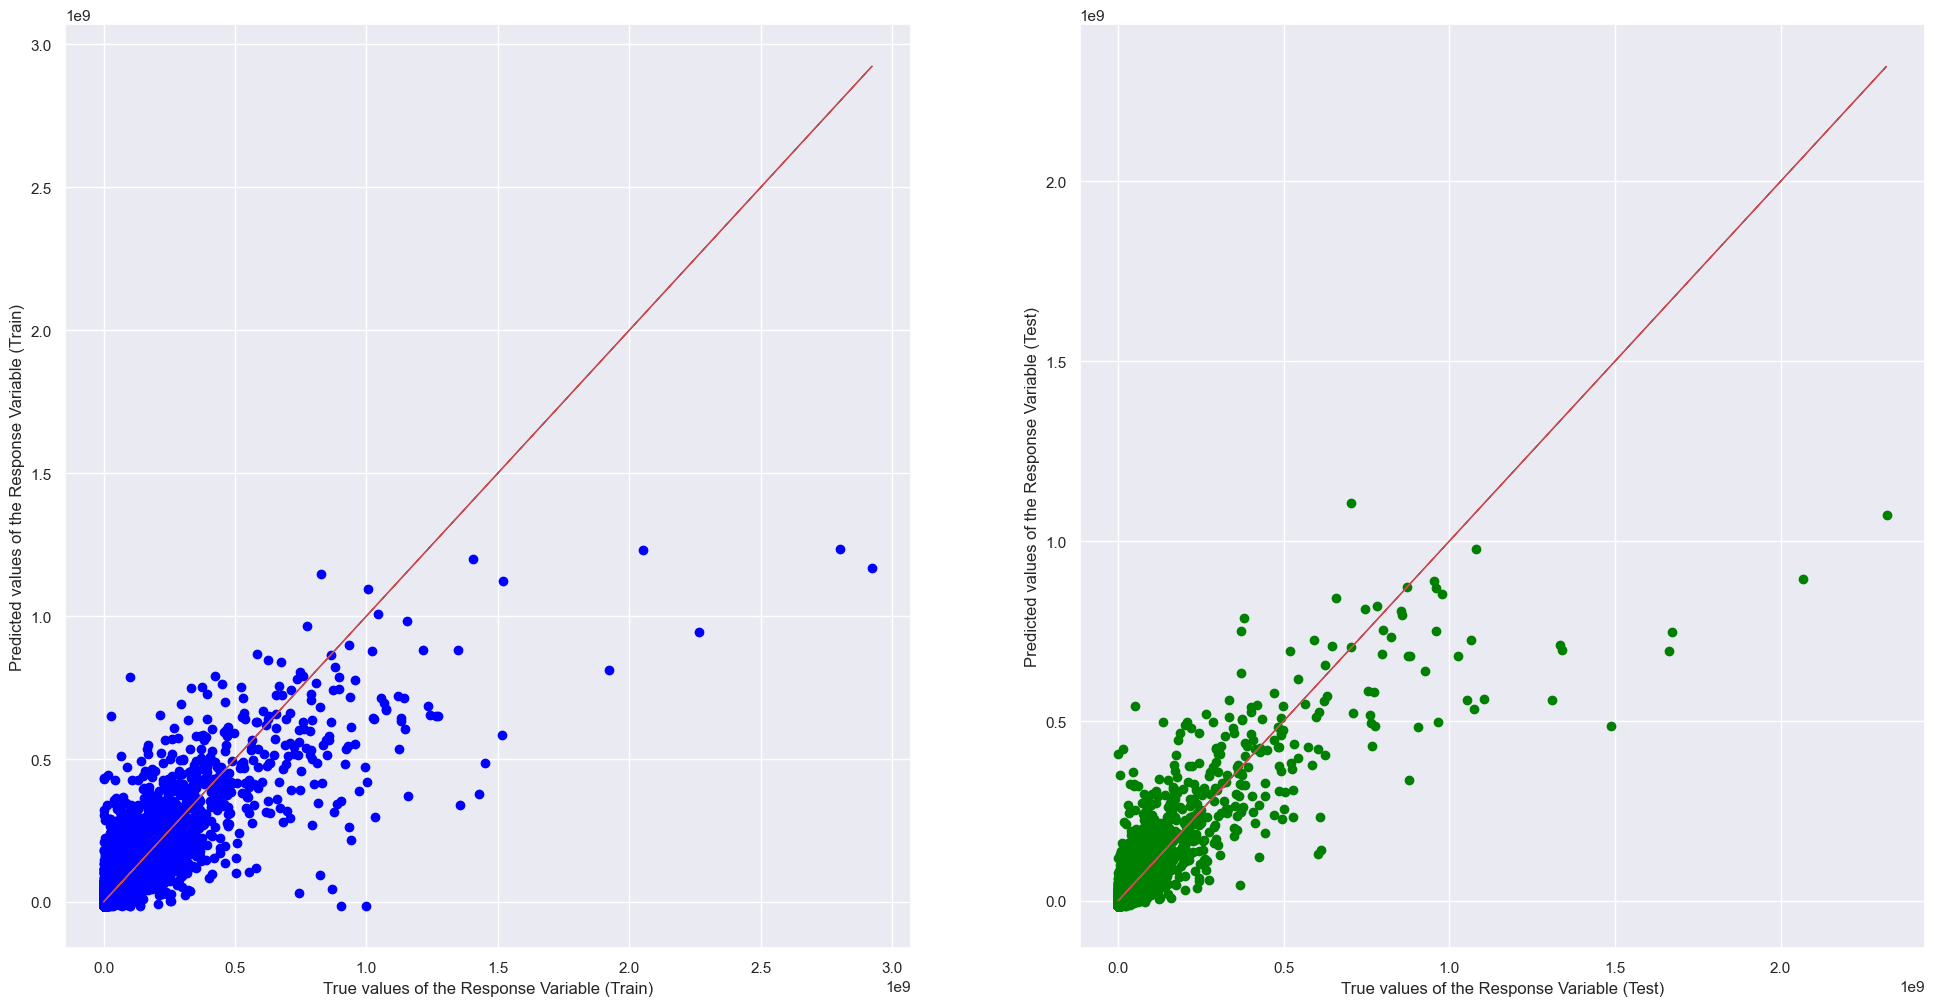

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6829335440216951
Mean Squared Error (MSE) 	: 7324628504112215.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7260520162280755
Mean Squared Error (MSE) 	: 7353174266182768.0



In [888]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["budget", "vote_count"]

y = pd.DataFrame(numericaldata["revenue"])
X = pd.DataFrame(numericaldata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Since the R^2 values for multi-variate numerical linear regression is higher than that for uni-variate numerical linear regression and the higher the R^2 values, the better the model is fitting the data. Therefore, the multi variate regression will be better than doing univariate model for numerical variable.

# Second Evaluation

Multi-Variate Numerical linear regression vs Random Forest Regression

#### Multivariate Numerical Linear Regression:

##### Predictors: Budget, Vote_count

R²: 0.7389451690788945

MSE: 7,849,445,388,950,254

#### Random Forest Regression:

##### Predictors: Budget, Vote_count, first_genre, original_language

R²: 0.7070462366184563

MSE: 7,722,854,419,082,516

The linear regression model shows a slightly higher R² value than the Random Forest model. This suggests that the linear regression model explains a bit more of the variance in the revenue from the predictors used.

The Random Forest has a slightly lower MSE, indicating a smaller average squared error in predictions. The MAE for the Random Forest model is also lower, which points to its predictions being closer to the actual values on average, making it more reliable for predicting exact revenue figures.

Random Forest models are typically more complex and can model non-linear relationships better than linear regression models. They are less likely to underfit but can be prone to overfitting if not tuned properly. Random Forest models can provide insights into the importance of individual features, which can be beneficial for understanding which factors most strongly influence revenue and they are generally more robust to outliers and can handle various data types and distributions more effectively than linear regression.

## In Conclusion,

While the multivariate numerical linear regression model shows a marginally better goodness of fit in terms of R², the Random Forest regression model potentially offers a better overall package by having:

1.Slightly better performance on error metrics (lower MSE and MAE).

2.Greater flexibility in handling both numerical and categorical data.

3.Ability to capture more complex and non-linear relationships between variables.

Therefore, if the goal is to achieve the most accurate and reliable predictions, considering both the magnitude and direction of errors, the Random Forest model might be preferable despite a slightly lower R². Its advantages in handling a mix of variable types and its robustness to outliers make it a more versatile choice in practical scenarios, especially when data is complex and includes influential categorical predictors. Additionally, tuning parameters and employing proper cross-validation in Random Forest can further enhance its performance, potentially surpassing the linear regression model in future evaluations.